# Problem Statement:
**The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).**

**This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.**

-------------------

# Attribute Information

**Input variables (based on physicochemical tests):**

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)**

**What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.**

------------------

## --------------------------------------------------------------------------------------------------------

In [1]:
# Now import some important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Shuffling the dataset to get info

In [3]:
 df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1305,7.5,0.610,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.80,5
874,10.4,0.380,0.46,2.1,0.104,6.0,10.0,0.99664,3.12,0.65,11.80,7
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6
1276,8.5,0.400,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.00,4
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7


### As we can see that even after shuffling we are not able to find out NaN values in the dataset . 

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
print("Rows, columns: " + str(df.shape))

Rows, columns: (1599, 12)


### So we have 1599 rows and 12 columns in the dataset

# Now lets check null values in the columns

In [7]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


**soo here the output is representing in booleans type and here we have 1599 rows and 12 columns which is a large data and we not able to see the complete rows here ,so we will go for next step.**

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Here we can see properly that we dont have any Null Values in any columns..**

In [9]:
df.isnull().sum().sum()


0

<AxesSubplot:>

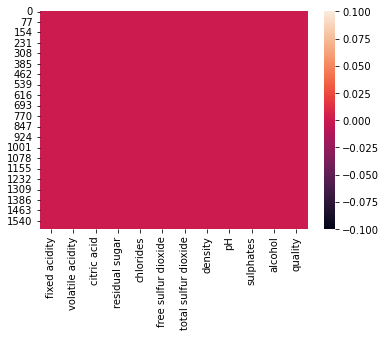

In [10]:
sns.heatmap(df.isnull())

**0 Null Values**

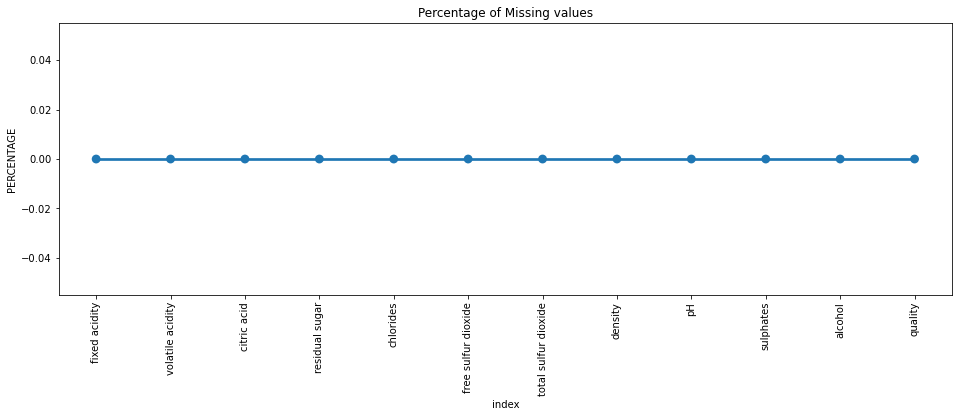

In [11]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## So it is confirmed that has NaN values

-----

### But before going for EDA ,1st distribute target column into 1 and 0 ,as specified in project discription..When value is 7 or above its 1 and else it 0

In [12]:
# Creating Our own target variable
df['quality_new'] = [1 if x >= 7 else 0 for x in df['quality']]

-------------------

In [13]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_new
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [14]:
# Now lets drop quality columns from the data frame ,other we will get 2 outputs

df= df.drop('quality', axis = 1)

In [15]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


**So This is our New Classification Model DataFrame**

# ---------------------------------------------------------------

# EDA

## Now Let do Univariate Analysis

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_new'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='quality_new'>

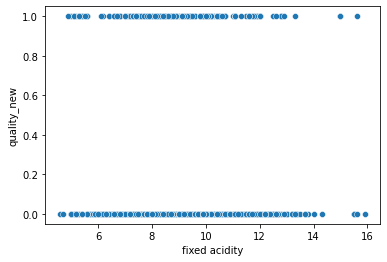

In [17]:
sns.scatterplot(x='fixed acidity',y='quality_new',data=df)

**We can see the Fixed acidity is equally distributed in the range of 0 to 13 with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='volatile acidity', ylabel='quality_new'>

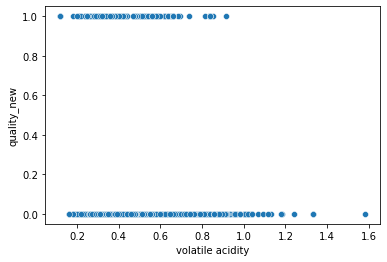

In [18]:
sns.scatterplot(x='volatile acidity',y='quality_new',data=df)

**We can see the volatile acidity is equally distributed in the range of 0.0 to 0.9  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='citric acid', ylabel='quality_new'>

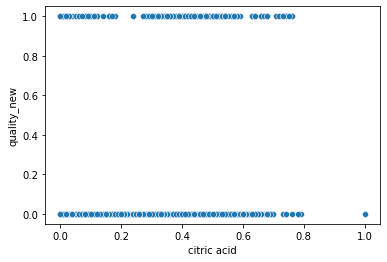

In [19]:
sns.scatterplot(x='citric acid',y='quality_new',data=df)

**We can see the citric acidity is equally distributed in the range of 0.0 to 0.8  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='residual sugar', ylabel='quality_new'>

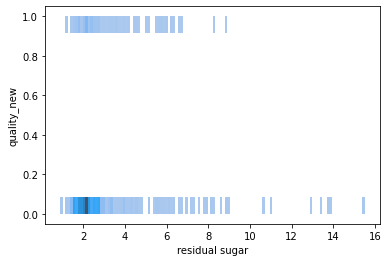

In [20]:
sns.histplot(x='residual sugar',y='quality_new',data=df)

**We can see the residual sugar is equally distributed in the range of 0.0 to 0.7  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='chlorides', ylabel='quality_new'>

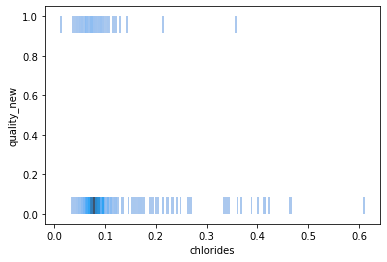

In [21]:
sns.histplot(x='chlorides',y='quality_new',data=df)

**We can see the chlorides is equally distributed in the range of 0.0 to 0.2  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality_new'>

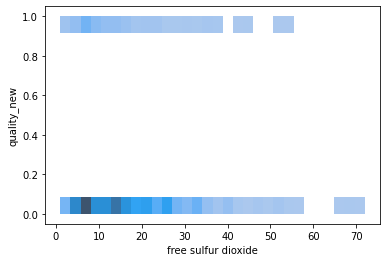

In [22]:
sns.histplot(x='free sulfur dioxide',y='quality_new',data=df)

**We can see the free sulfur dioxide is equally distributed in the range of 0 to 35  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality_new'>

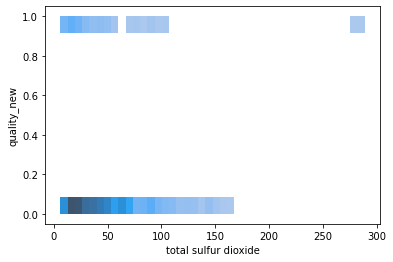

In [23]:
sns.histplot(x='total sulfur dioxide',y='quality_new',data=df)

**We can see the total sulfur dioxide is equally distributed in the range of 0 to 120  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='density', ylabel='quality_new'>

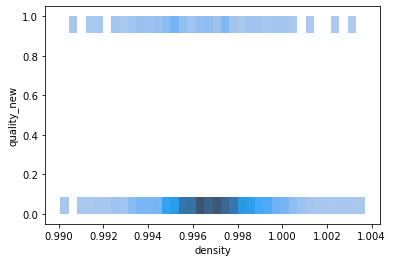

In [24]:
sns.histplot(x='density',y='quality_new',data=df)

**We can see the density is equally distributed in the range of 0.992 to 1.001  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='pH', ylabel='quality_new'>

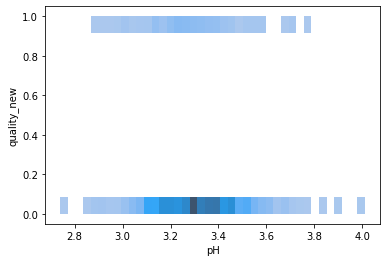

In [25]:
sns.histplot(x='pH',y='quality_new',data=df)

**We can see the pH is equally distributed in the range of 2.8 to 3.6  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='sulphates', ylabel='quality_new'>

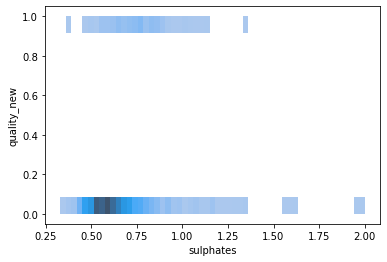

In [26]:
sns.histplot(x='sulphates',y='quality_new',data=df)

**We can see the pH is equally distributed in the range of 0.30 to 1.20  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='alcohol', ylabel='quality_new'>

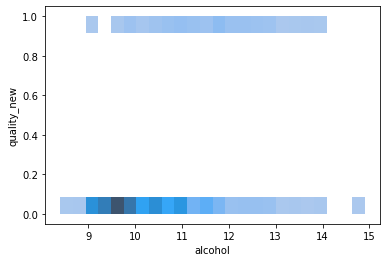

In [27]:
sns.histplot(x='alcohol',y='quality_new',data=df)

**We can see the pH is equally distributed in the range of 9.5 to 14  with the quality_new of 0 and 1 . .**

### ----------------------------------------------------------------------------------------------

## Now lets do some Bi variate analysis which are more equally distributed with target column

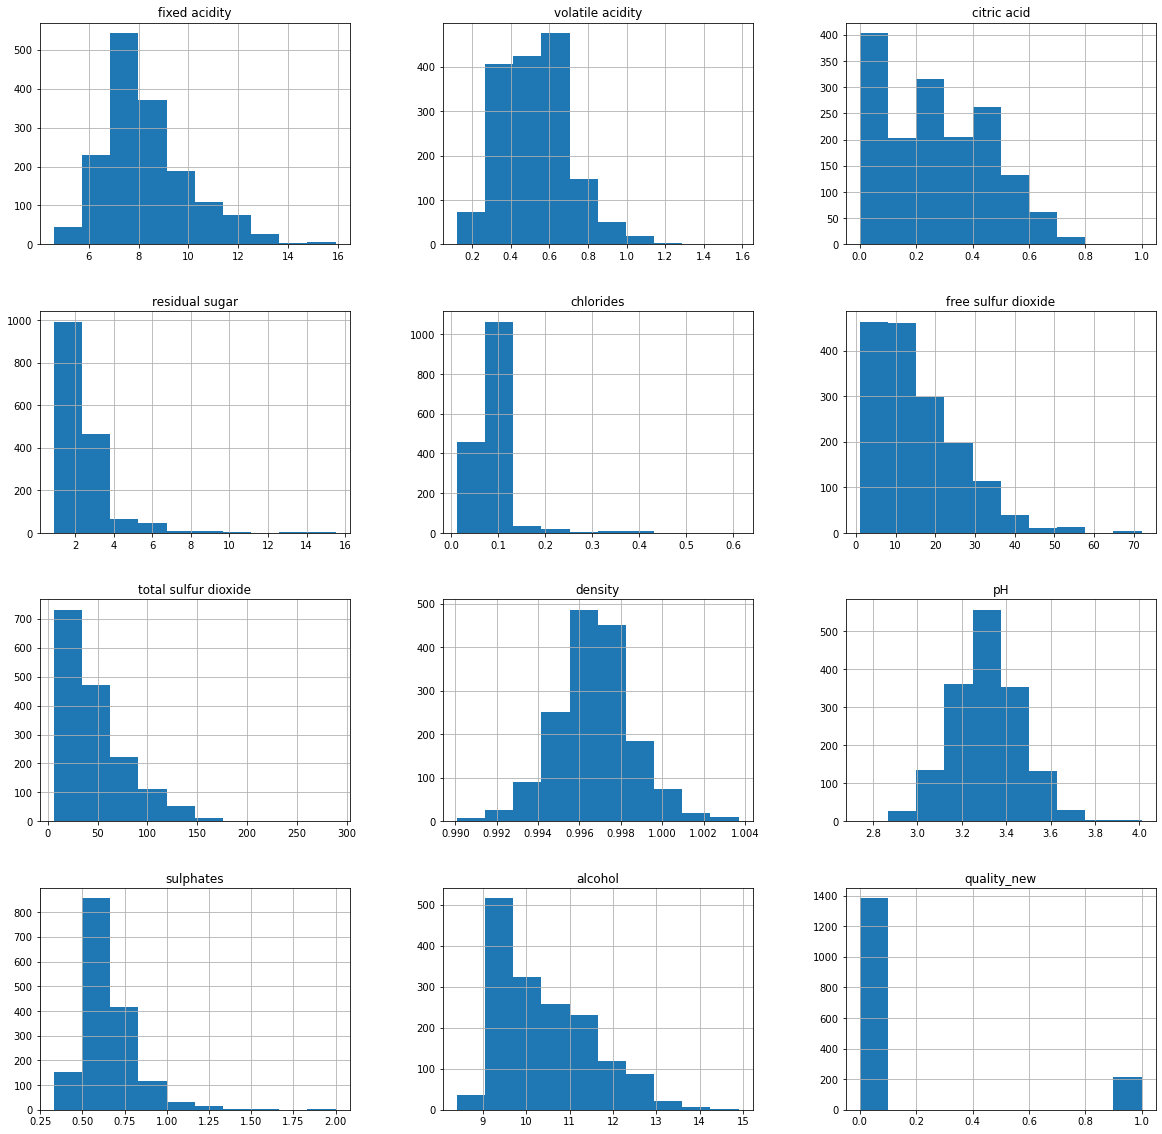

In [28]:
df.hist(bins=10, figsize=(20,20))
plt.show()


**1. we can see that many of the data are highly skewed**

**2. here in quality_new ,good quaility of wine or 1 is less or imbalanced as compared to 0 or bad quality**

**3. Density and pH are having normally distributed and are not skewed**


<AxesSubplot:xlabel='alcohol', ylabel='density'>

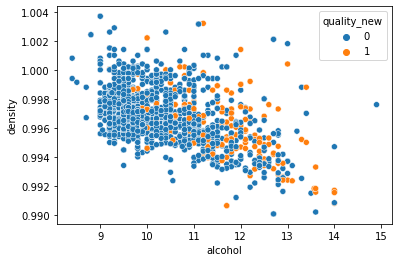

In [29]:
sns.scatterplot(x='alcohol',y='density',hue='quality_new',data=df)

**0 is more scattered than 1 and it is considered the density of water is close to that of water depending on the percent alcohol and here we can see that the data is scattered  between 9 to 13** 

<AxesSubplot:xlabel='pH', ylabel='density'>

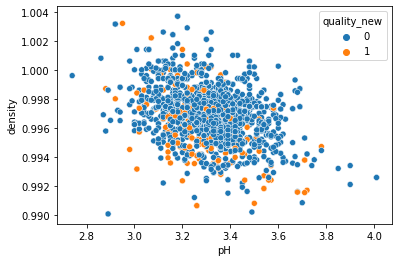

In [30]:
sns.scatterplot(x='pH',y='density',hue='quality_new',data=df)

**pH :- describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the graph**

**And we can clearly see that the max data is scattered between 3 to 3.6 for density and pH**
    

<Figure size 1800x2160 with 0 Axes>

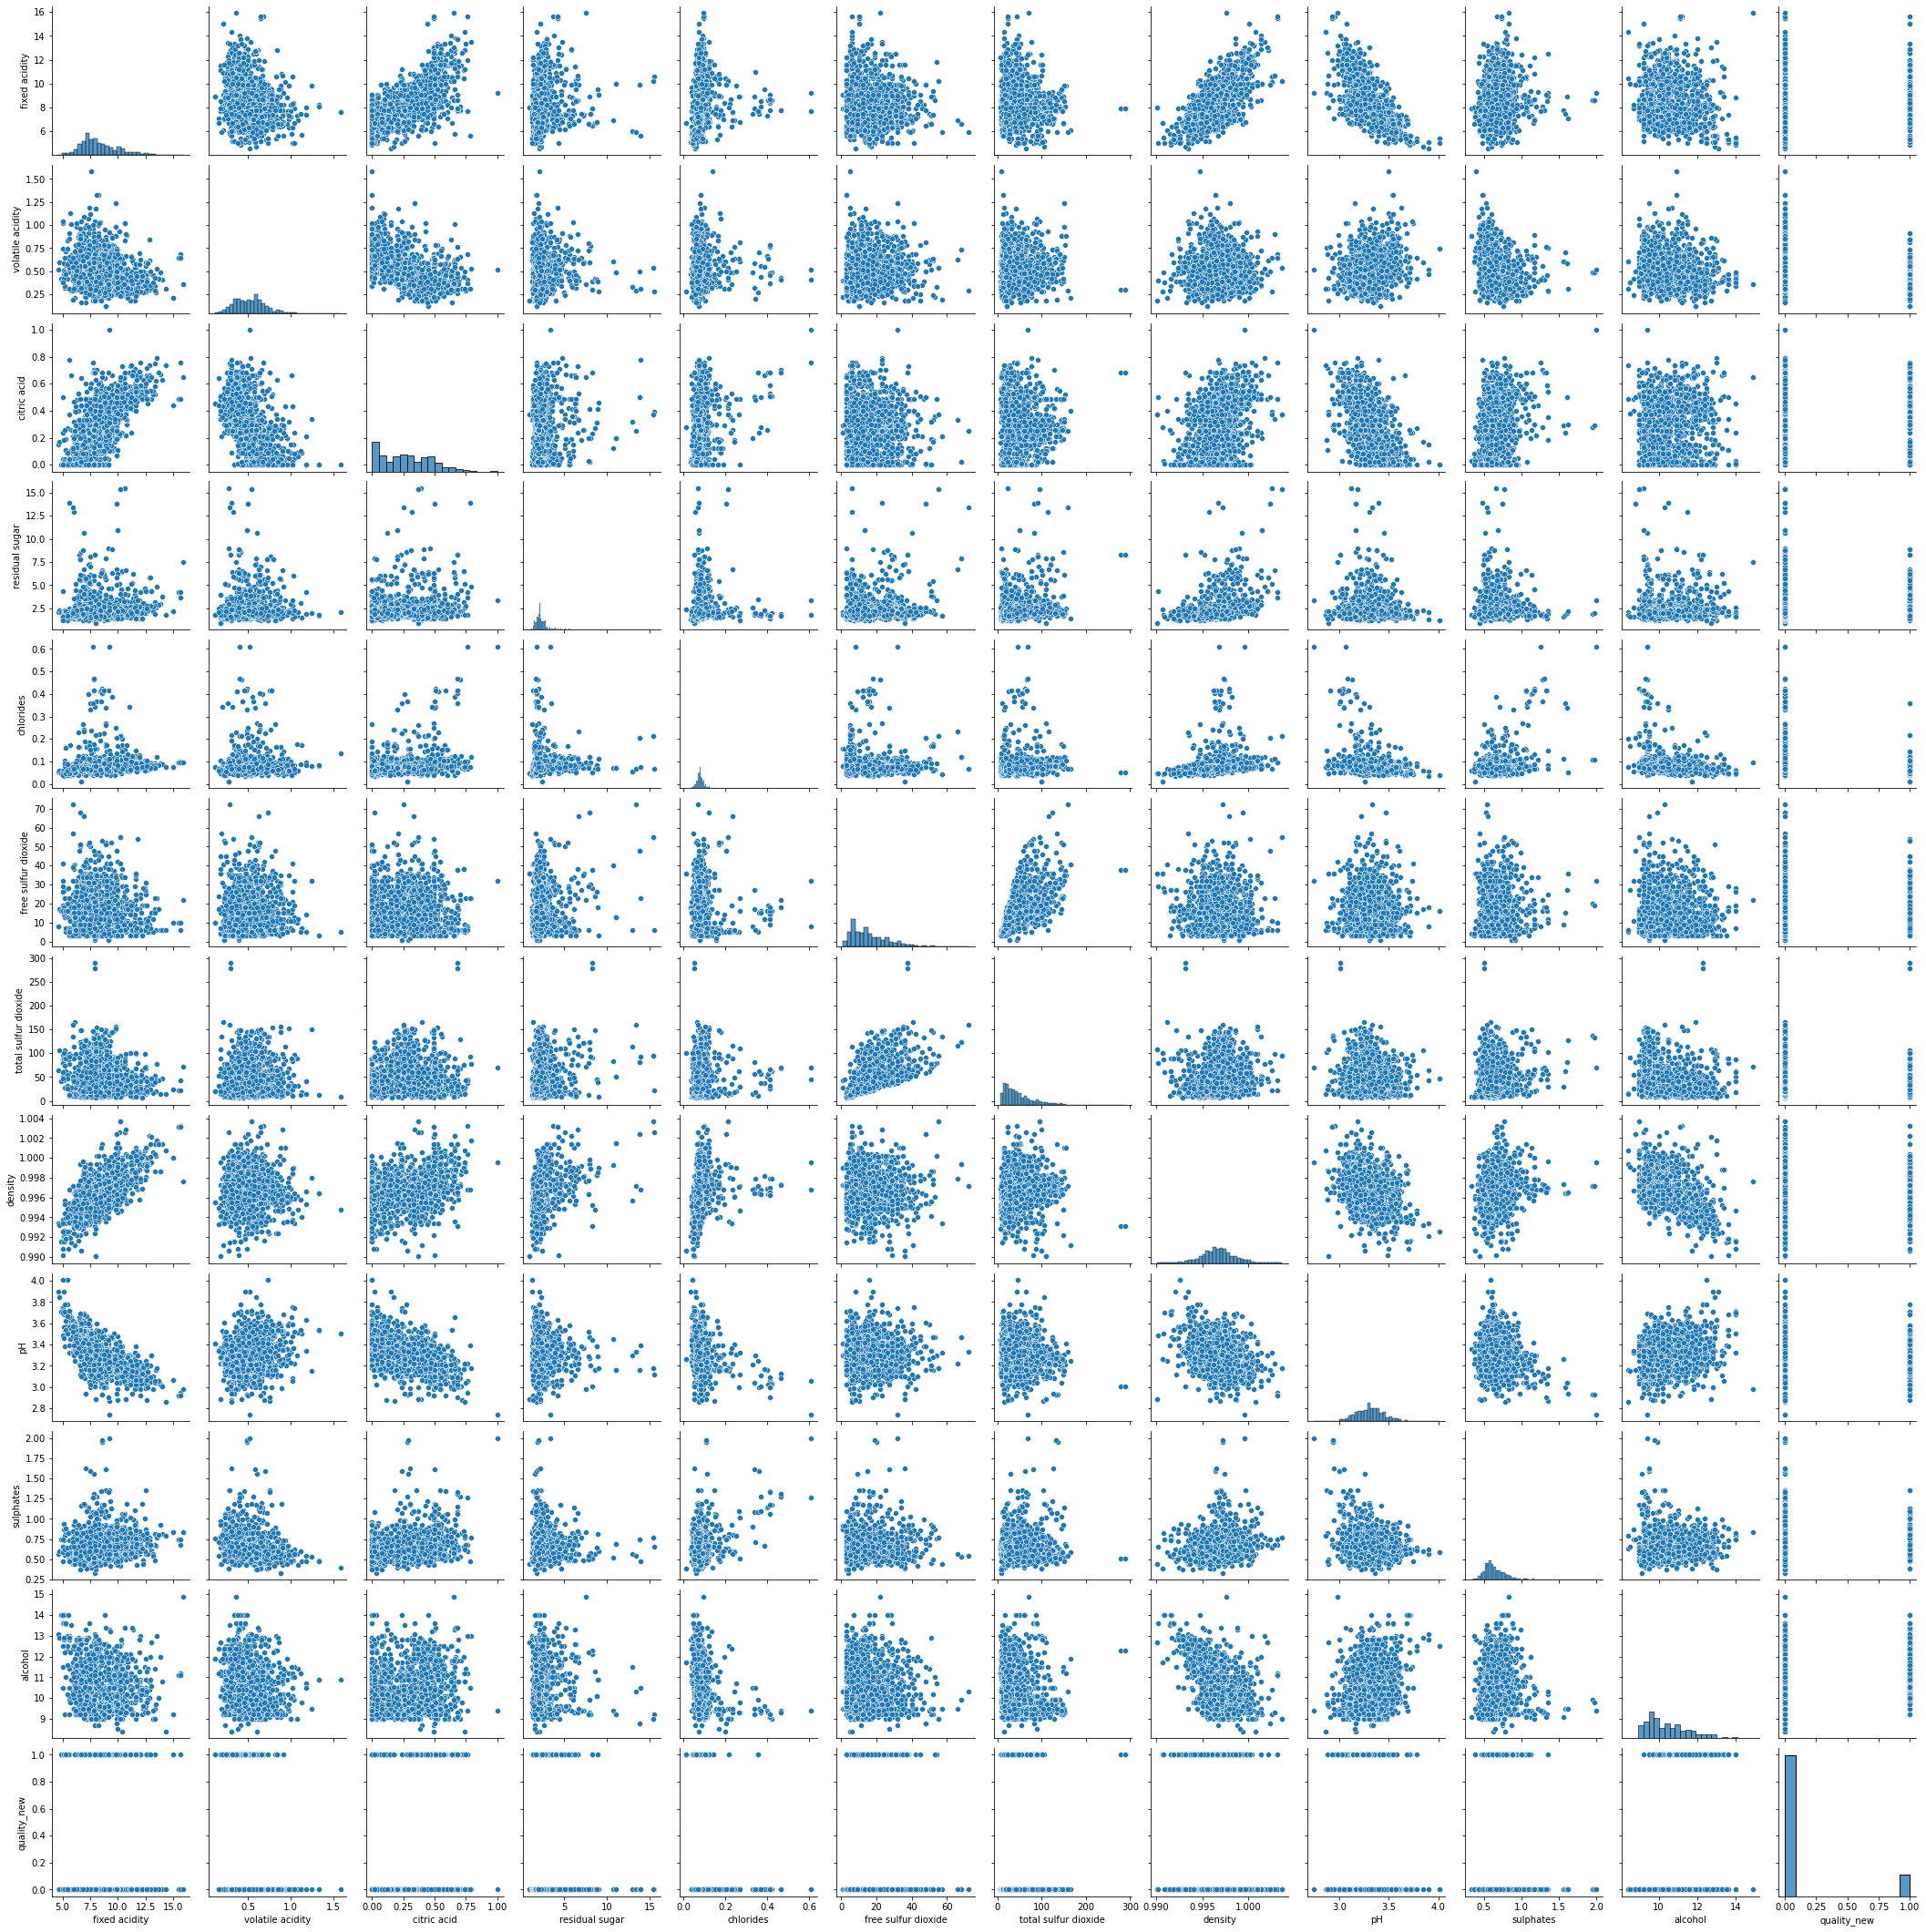

In [31]:
# Lets plot eerything all together

plt.figure(figsize=(25,30))

sns.pairplot(df)

plt.show()

--------------------------

# Now Lets check the Duplicate Values

In [32]:
df.shape

(1599, 12)

In [33]:
# Check any duplicate data is present or not, If present then we will drop them.
df=df.drop_duplicates()

In [34]:
df.shape

(1359, 12)

## So Now Duplicated values have now been deleted

# Now Lets See that counts of each columns

In [35]:
# Now lets find the value counts of the  Columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*100)

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64
****************************************************************************************************
0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64
****************************************************************************************************
0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: citric acid, Length: 80, dtype: int64
****************************************************************************************************
2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: residual sugar, Length:

## Here we cannot see any abnormal values present in the dataset nor i can find out much of zero values which can impact the target variable

## quality_new column which is a target variable also has 2 class as 0 and 1 and here the dataset seems to be imbalanced

# Correlation

In [36]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.116120
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.267344
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.203561
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.052811
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.096806
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.072771
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.135877
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.158052
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.054131
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.201551


In [37]:
df.corr()['quality_new'].sort_values()

volatile acidity       -0.267344
density                -0.158052
total sulfur dioxide   -0.135877
chlorides              -0.096806
free sulfur dioxide    -0.072771
pH                     -0.054131
residual sugar          0.052811
fixed acidity           0.116120
sulphates               0.201551
citric acid             0.203561
alcohol                 0.409926
quality_new             1.000000
Name: quality_new, dtype: float64

**Here all the datasets are different and have no Multicollinearity**

<AxesSubplot:>

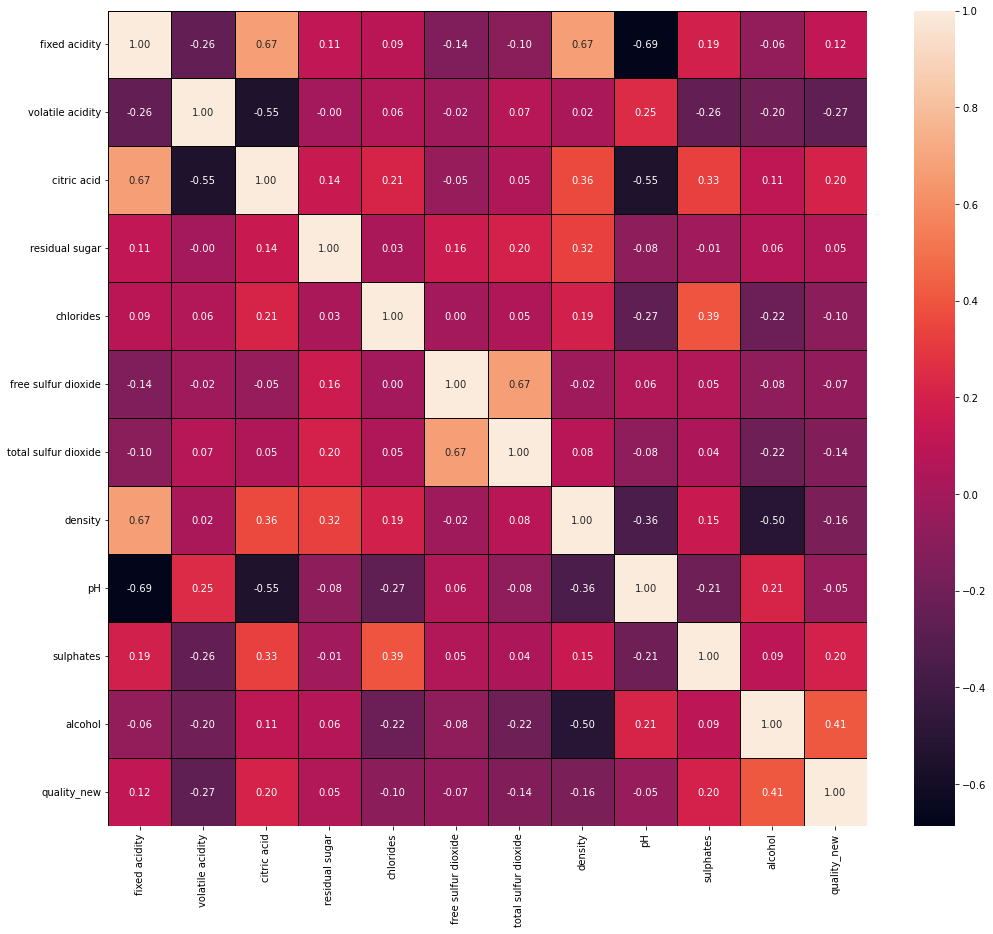

In [38]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

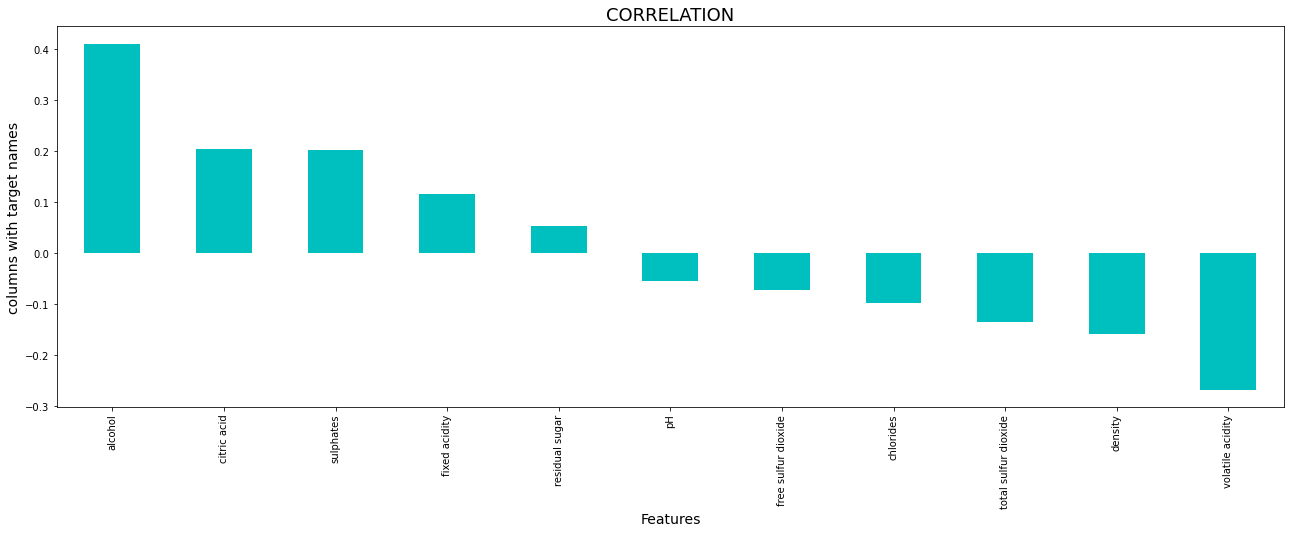

In [39]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(22,7))
df.corr()['quality_new'].sort_values(ascending=False).drop(['quality_new']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

# DESCRIPTIVE STATSTICS

In [40]:
# Statistical description of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


<AxesSubplot:>

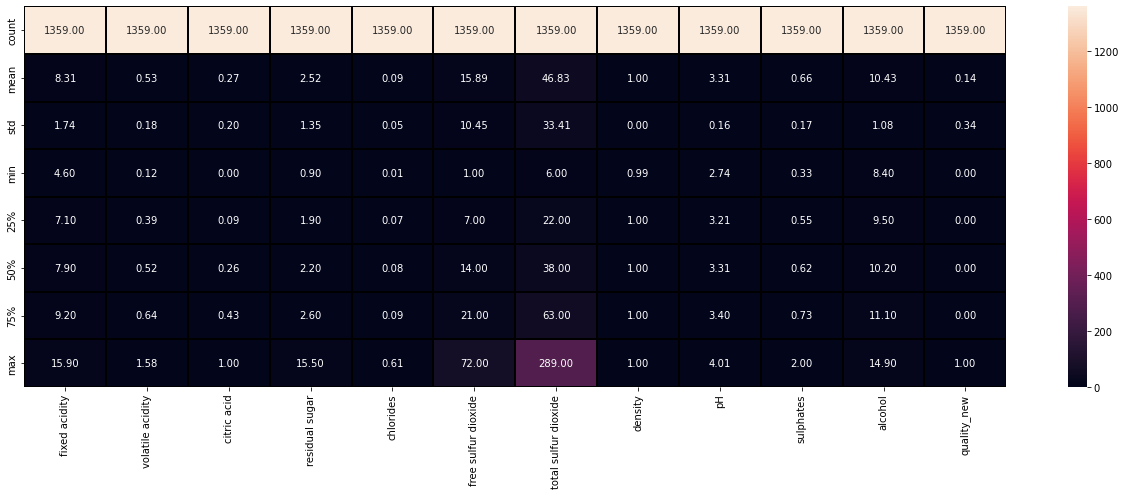

In [41]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

### Outcome of describe() of dataset :-

**from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column**

-----------------------------------------------------
**Total number rows and column in dataset**

1. Rows :- 1599
2. columns :- 12
-----------------------------------------------------
**Fixed acidity**

Mean    :- 0.53

std     :- 1.74

minimum :- 4.60

Maximum :- 15.90

------------------------------------------------------
**Volatile acidity**

Mean    :- 8.32

std     :- 0.18

minimum :- 0.12

Maximum :- 1.58

-------------------------------------------------------
**Citric Acid**

Mean    :- 0.27

std     :- 0.19

minimum :- 0.00

Maximum :- 1.00

----------------------------------------------------------
**Residual Suger**

Mean    :- 2.54

std     :- 1.41

minimum :- 0.90

Maximum :- 15.50

----------------------------------------------------------
**Chlorides**

Mean    :- 0.05

std     :- 0.09

minimum :- 0.01

Maximum :- 0.61

-------------------------------------------------------------
**Free Sulfur dioxide**

Mean    :- 15.87

std     :- 10.46

minimum :- 1.00

Maximum :- 72.00

-------------------------------------------------------------
**Total Sulfur Dioxide**

Mean    :- 46.47

std     :- 32.90

minimum :- 6.00

Maximum :- 289.00

-------------------------------------------------------------
**Density**

Mean    :- 1.00

std     :- 0.00

minimum :- 0.99

Maximum :- 1.00

--------------------------------------------------------------
**pH**

Mean    :- 3.31

std     :- 0.15

minimum :- 2.74

Maximum :- 4.01

----------------------------------------------------------------
**Sulphates**

Mean    :- 0.66

std     :- 0.17

minimum :- 0.33

Maximum :- 2.00

---------------------------------------------------------------
**Alcohol**

Mean    :- 10.42

std     :- 1.07

minimum :- 8.40

Maximum :- 14.90

----------------------------------------------------------------

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality_new           1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


**From the above cell we can get have the datatypes of the columns and memory used by dataframe**

# OUTLIERS CHECKING

In [43]:
# here we will make the variable where we will give some values

colmlist=df.columns.values
ncol=30
nrows=14

In [44]:
colmlist

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality_new'], dtype=object)

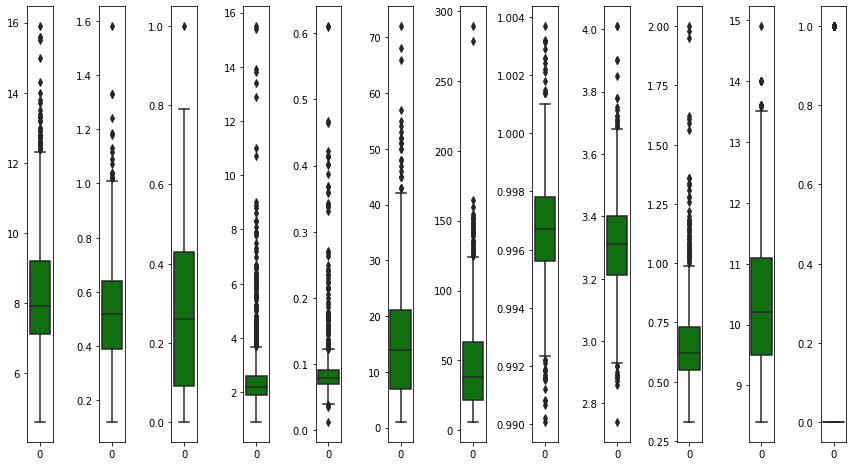

In [45]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= df[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

**We can see that Outliers are present in maximum of the data ,we are going to remove this later but 1st we will remove skewness..**

# Skewness

In [46]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality_new             2.133662
dtype: float64

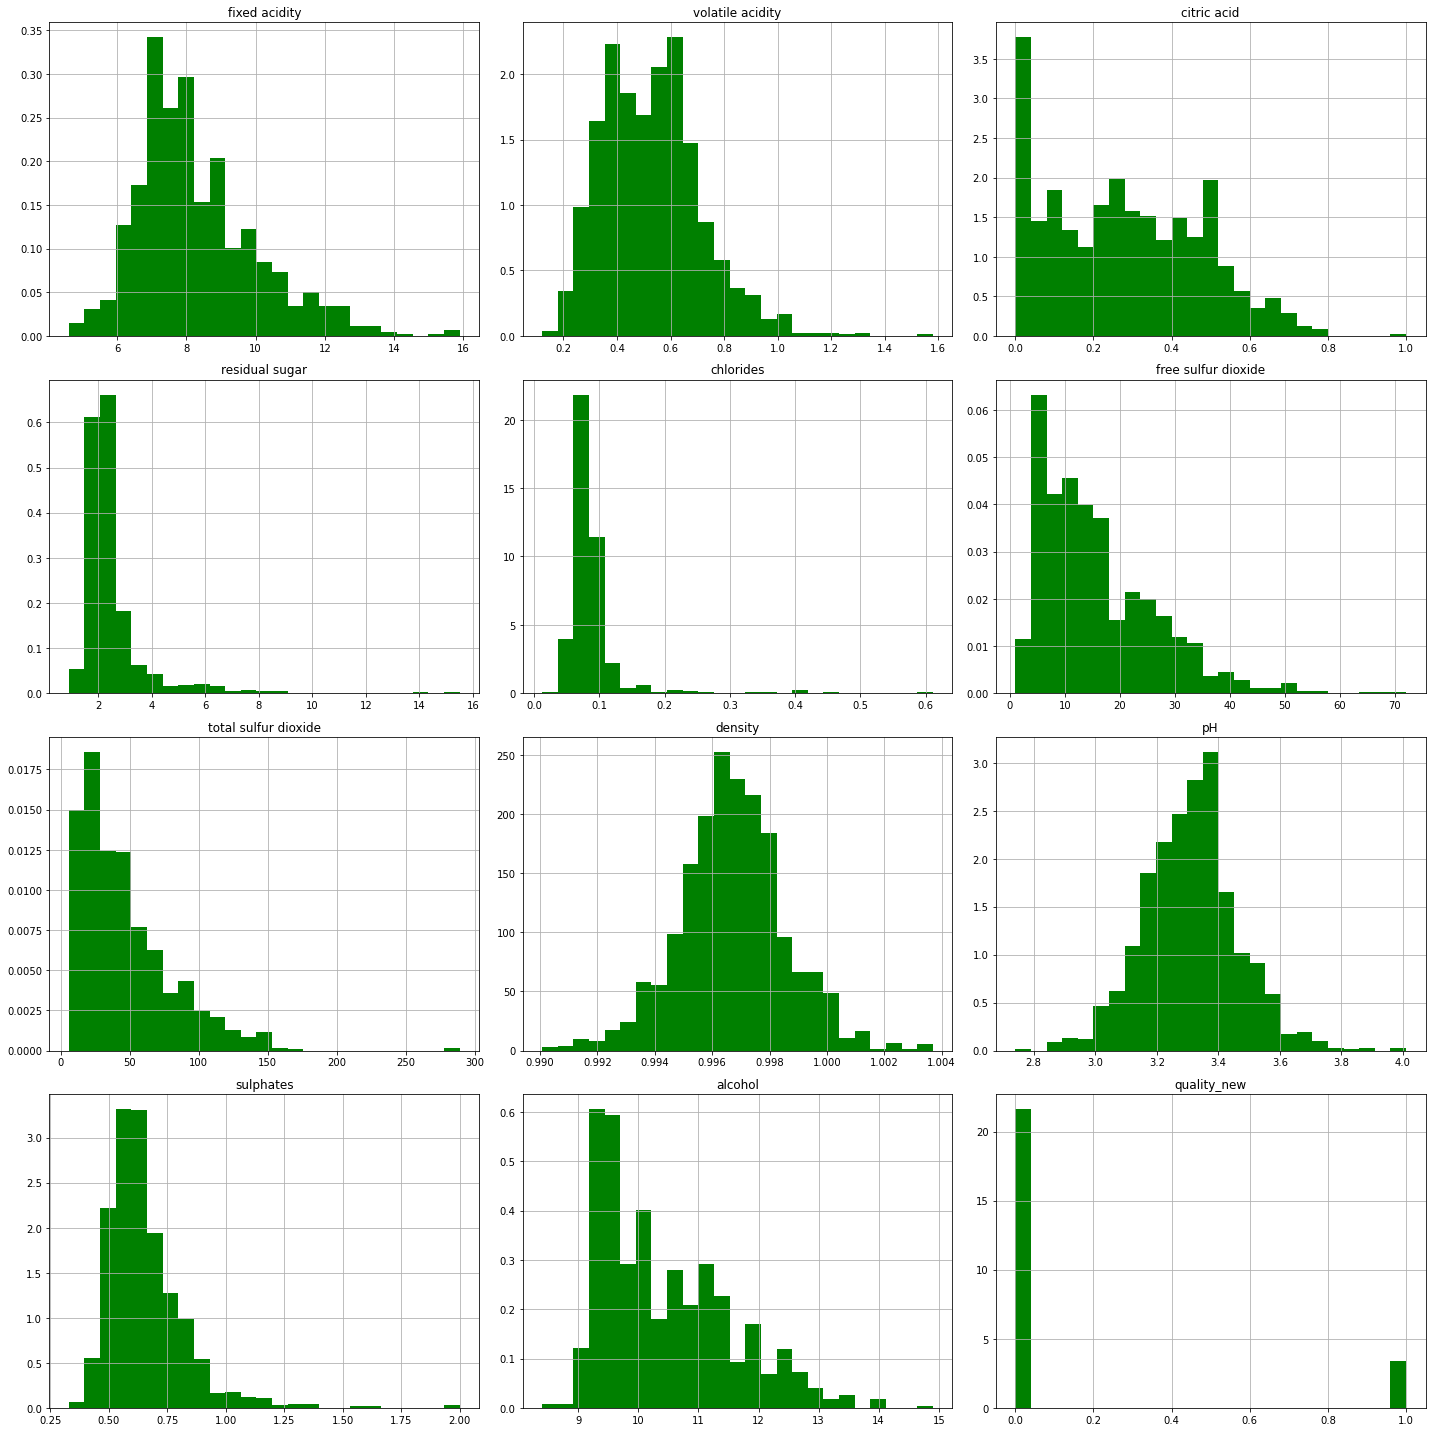

In [47]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

## WE can see only density and pH are little normally distributed rest all are skewed or unbalanced data

## fixed acidity,volatile acidity ,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol


#### Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

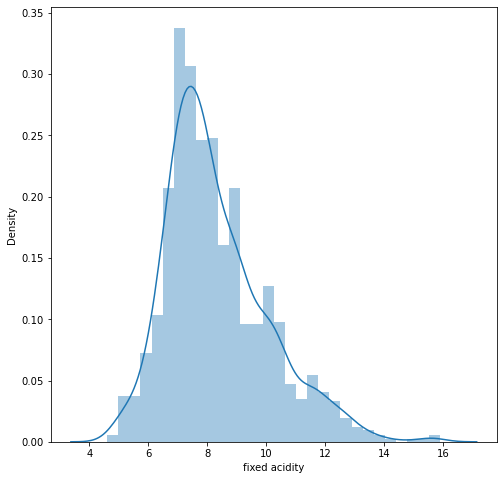

In [48]:
plt.figure(figsize=(8,8))
sns.distplot(df['fixed acidity'])

**The data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..**

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

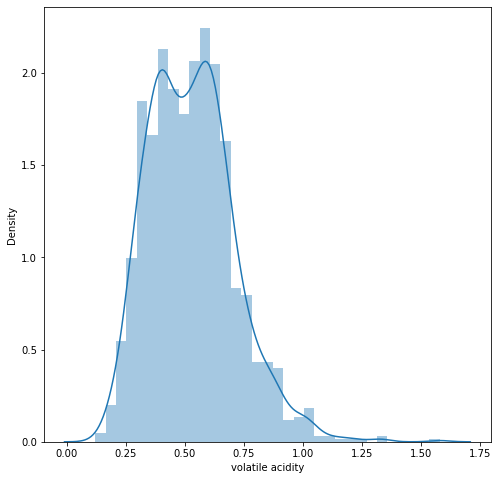

In [49]:
plt.figure(figsize=(8,8))

sns.distplot(df['volatile acidity'])

**The data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..**

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

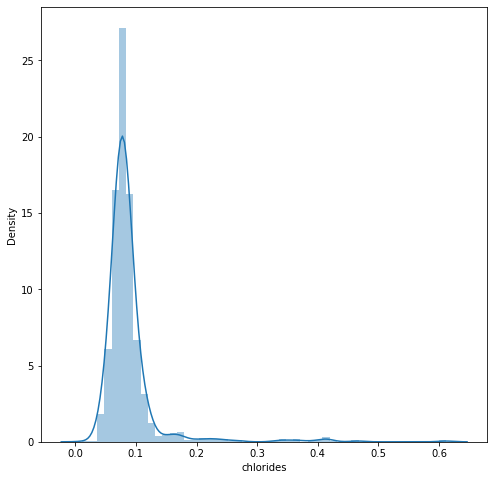

In [50]:
plt.figure(figsize=(8,8))

sns.distplot(df['chlorides'])

**Its a right skewed data and it is not Normalized**

###### CONCLUSION:- 

**we can see that the data is not normally distributed** 

**Normal distribution curve of outcome column  is irrelevent**

# Removing Outliers

In [51]:
from scipy.stats import zscore

# Here i am taking all the features ,because every columns have outliers

In [52]:
z=np.abs(zscore(df))
z.shape

(1359, 12)

In [53]:

np.where(z>3)

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
          41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
          99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
         150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
         252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
         363,  385,  385,  393,  408,  420,  420,  433,  448,  473,  483,
         483,  485,  485,  492,  506,  510,  513,  516,  528,  534,  555,
         562,  562,  564,  565,  565,  565,  582,  582,  592,  597,  599,
         602,  626,  627,  632,  652,  671,  672,  687,  710,  722,  764,
         764,  781,  786,  791,  792,  838,  866,  888,  895,  895,  912,
         918,  918,  920,  920,  945,  948,  963,  985,  994, 1003, 1013,
        1049, 1052, 1060, 1060, 1060, 1073, 1081, 1081, 1082, 1082, 1103,
        1106, 1107, 1117, 1121, 1123, 1123, 1125, 1151, 1159, 1162, 1165,
        1216, 1216, 1216, 1250, 1250, 

In [54]:
df_new=df[(z<3).all(axis=1)]

In [55]:
df_new.shape

(1239, 12)

In [56]:
df.shape

(1359, 12)

In [57]:
print ("Old DataFrame =",df.shape)
print ("New DataFrame =",df_new.shape)
print ("Total dropped rows = ",df.shape[0] - df_new.shape[0])

Old DataFrame = (1359, 12)
New DataFrame = (1239, 12)
Total dropped rows =  120


#### Percentage Data Loss

In [58]:
loss_percent=(1359-1239)/1359*100
print (loss_percent,'%')

8.830022075055188 %


**Data Loss while Removing the Outliers are almost 9%**

In [59]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [60]:
# Independent column

x=df_new.iloc[:,0:-1]

In [61]:
x.shape

(1239, 11)

In [62]:
# Target or dependent variable

y=df_new.iloc[:,-1]

In [63]:
y.shape

(1239,)

### --------------------------------------------------------------------------------------------------

## TRANSFORMING DATA TO REMOVE SKEWNESS

In [64]:
from sklearn.preprocessing import power_transform

In [65]:
L1=['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

In [66]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [67]:
#Removing skewness using yeo-johnson
df_new[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']] = PT.fit_transform(df_new[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']].values)

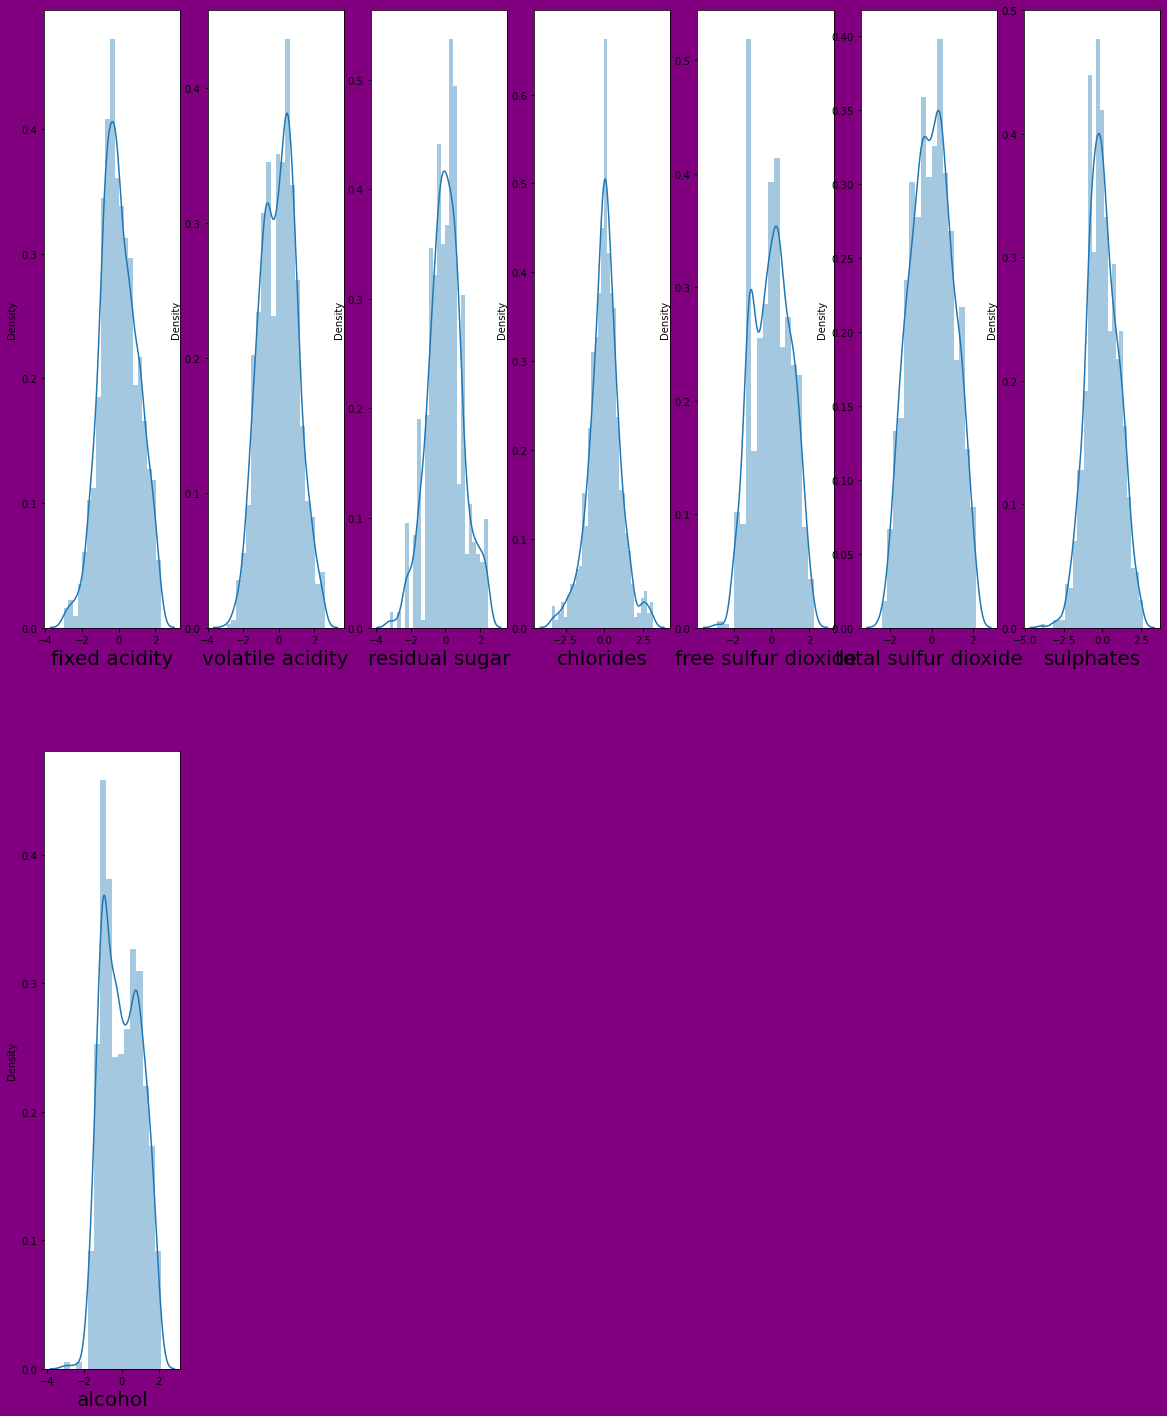

In [68]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='purple')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Now we can see that my dataset is normalized now and free from skewness

In [69]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.549327,1.009464,-1.392862,-0.578382,-0.256693,-0.446214,-0.341994,0.650860,1.394315,-0.631624,-0.984429
1,-0.306878,2.050338,-1.392862,0.267395,0.712816,1.052631,0.757739,0.068312,-0.806846,0.292777,-0.599091
2,-0.306878,1.356422,-1.183521,-0.095080,0.448404,-0.017973,0.324511,0.184821,-0.380815,0.061676,-0.599091
3,1.753944,-1.419242,1.537914,-0.578382,-0.300762,0.196148,0.524462,0.767369,-1.090867,-0.477557,-0.599091
4,-0.549327,0.778159,-1.392862,-0.699207,-0.300762,-0.232094,-0.142042,0.650860,1.394315,-0.631624,-0.984429
...,...,...,...,...,...,...,...,...,...,...,...
1234,-0.913002,0.546853,-0.974180,-0.578382,-0.609242,1.373812,-0.208693,-0.100627,0.755268,1.371244,-0.888094
1235,-1.276676,0.431201,-0.974180,-0.457556,0.360267,1.802053,-0.008741,-1.038529,0.968284,-0.477557,0.075251
1236,-1.458514,0.142069,-0.869509,-0.215906,-0.873653,2.551475,0.224535,-0.910368,1.465320,0.909044,0.749592
1237,-1.458514,0.691419,-0.764839,-0.457556,-0.300762,1.802053,-0.008741,-0.706477,1.820346,0.523877,-0.213753


In [70]:
x.mean()

fixed acidity           7.910451e-16
volatile acidity        2.032273e-16
citric acid             2.779590e-16
residual sugar          1.453415e-16
chlorides              -2.516147e-16
free sulfur dioxide     2.750916e-17
total sulfur dioxide    2.922288e-17
density                 8.101357e-14
pH                      7.078904e-18
sulphates               5.672532e-16
alcohol                -1.523398e-15
dtype: float64

In [71]:
x.std()

fixed acidity           1.000404
volatile acidity        1.000404
citric acid             1.000404
residual sugar          1.000404
chlorides               1.000404
free sulfur dioxide     1.000404
total sulfur dioxide    1.000404
density                 1.000404
pH                      1.000404
sulphates               1.000404
alcohol                 1.000404
dtype: float64

#### Since the Outcome column have only 2 classes we will use  classification model.

In [72]:
df['quality_new'].unique()

array([0, 1], dtype=int64)

In [73]:
df['quality_new'].value_counts()

0    1175
1     184
Name: quality_new, dtype: int64

## Balancing the dataset over here,otherwise it will be a baised dataset

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [76]:
x.shape

(2140, 11)

In [77]:
y.value_counts()

0    1070
1    1070
Name: quality_new, dtype: int64

<AxesSubplot:xlabel='quality_new', ylabel='count'>

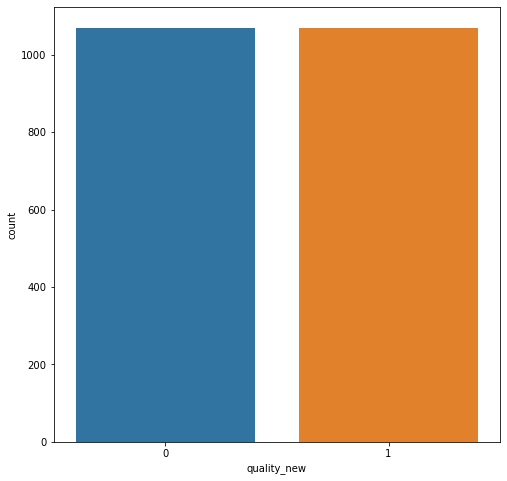

In [78]:
plt.figure(figsize=(8,8))
sns.countplot(y)

## Here we can see that my dataset is balanced now

# WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [82]:
vif_cal()

    VIF FACTOR              FEATURES
0     9.637818         fixed acidity
1     2.437533      volatile acidity
2     4.294019           citric acid
3     1.850365        residual sugar
4     1.322550             chlorides
5     1.918412   free sulfur dioxide
6     2.264229  total sulfur dioxide
7     8.100691               density
8     3.885106                    pH
9     1.557975             sulphates
10    5.153629               alcohol


## No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...

----------

-------------

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

###### Logistic Regression

In [107]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  20  The model performs very well
At random_state:- 20
Training accuaracy_score is :- 82.5
Testing accuracy_score is:- 82.5 


At random state  42  The model performs very well
At random_state:- 42
Training accuaracy_score is :- 82.5
Testing accuracy_score is:- 82.5 


At random state  79  The model performs very well
At random_state:- 79
Training accuaracy_score is :- 82.5
Testing accuracy_score is:- 82.5 


At random state  141  The model performs very well
At random_state:- 141
Training accuaracy_score is :- 82.7
Testing accuracy_score is:- 82.7 


At random state  199  The model performs very well
At random_state:- 199
Training accuaracy_score is :- 82.5
Testing accuracy_score is:- 82.5 


At random state  304  The model performs very well
At random_state:- 304
Training accuaracy_score is :- 82.2
Testing accuracy_score is:- 82.2 


At random state  365  The model performs very well
At random_state:- 365
Training accuaracy_score is :- 82.2
Testing accuracy_score is:-

### I am taking random state as 20 bcz here both training and testing score are same

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [109]:
lr.fit(x_train,y_train)

LogisticRegression()

In [110]:
pred_train=lr.predict(x_train)

In [111]:
pred_test=lr.predict(x_test)

In [112]:
accuracy_score(y_test,pred_test)

0.8247663551401869

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       225
           1       0.80      0.84      0.82       203

    accuracy                           0.82       428
   macro avg       0.82      0.83      0.82       428
weighted avg       0.83      0.82      0.82       428



## CROSS VALIDATION FOR LOGISTICS REGRESSION

In [115]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)


In [116]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 80.0
Accuracy_score is :- 82.4766355140187


At cv:- 5
Cross validation score is :- 80.51401869158879
Accuracy_score is :- 82.4766355140187


At cv:- 6
Cross validation score is :- 80.6034211437384
Accuracy_score is :- 82.4766355140187


At cv:- 7
Cross validation score is :- 80.65313557116835
Accuracy_score is :- 82.4766355140187


At cv:- 8
Cross validation score is :- 80.55386690144782
Accuracy_score is :- 82.4766355140187


At cv:- 9
Cross validation score is :- 80.88717906290506
Accuracy_score is :- 82.4766355140187




**We will take CV 9 bcz it is more close to accuracy_score**

In [117]:
lsscore_selected= cross_val_score(lr,x,y,cv=9).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.8088717906290506 
The accuracy_score is: 0.8247663551401869


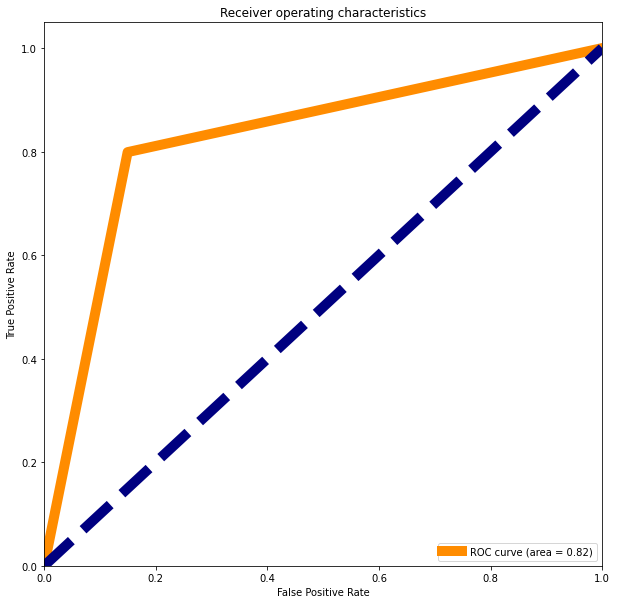

In [118]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## So Area under the curve is 82% which is good

# `DECISION TREE CLASSIFIER`

In [119]:
# Checking Accuracy for Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Prediction
preddt = dt.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))
print('CV  :-',cross_val_score(dt,x,y,cv=5).mean())

0.8691588785046729
[[188  37]
 [ 19 184]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       225
           1       0.83      0.91      0.87       203

    accuracy                           0.87       428
   macro avg       0.87      0.87      0.87       428
weighted avg       0.87      0.87      0.87       428

CV  :- 0.8570093457943925


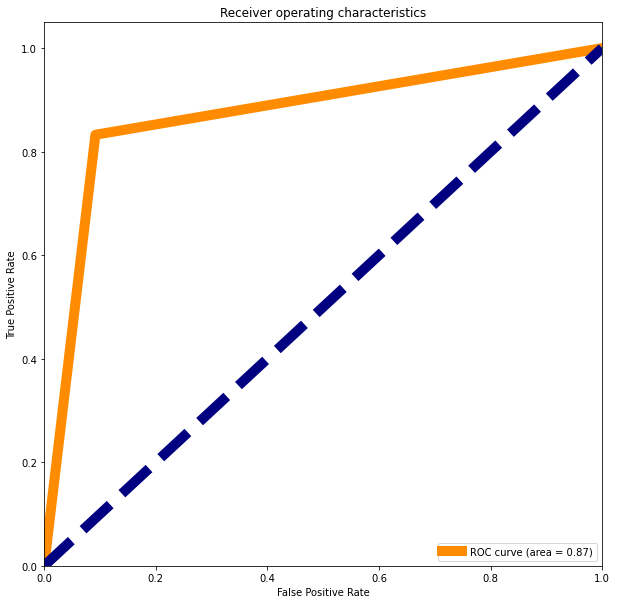

In [120]:
fpr,tpr,threshold=roc_curve(preddt,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### 87 % area is under the curve which is much better than Logistic Reg

# `KNeighbors Classifier`

In [121]:
# Checking accuracy for KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))
print('CV  :-',cross_val_score(knn,x,y,cv=5).mean())

0.8574766355140186
[[167  58]
 [  3 200]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       225
           1       0.78      0.99      0.87       203

    accuracy                           0.86       428
   macro avg       0.88      0.86      0.86       428
weighted avg       0.88      0.86      0.86       428

CV  :- 0.8453271028037381


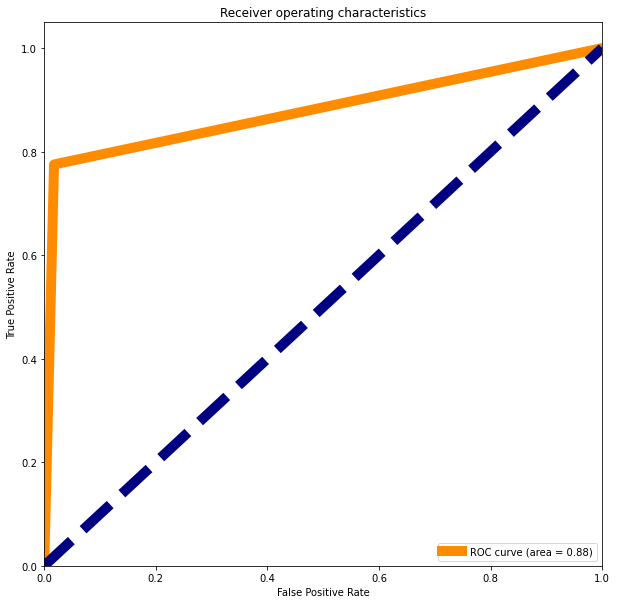

In [122]:
fpr,tpr,threshold=roc_curve(predknn,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### Here 88% area is under the curve which is best till now

# ENSEMBLE TECHNIQUE

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('CV  :-',cross_val_score(rf,x,y,cv=5).mean())

0.9345794392523364
[[203  22]
 [  6 197]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       225
           1       0.90      0.97      0.93       203

    accuracy                           0.93       428
   macro avg       0.94      0.94      0.93       428
weighted avg       0.94      0.93      0.93       428

CV  :- 0.913551401869159


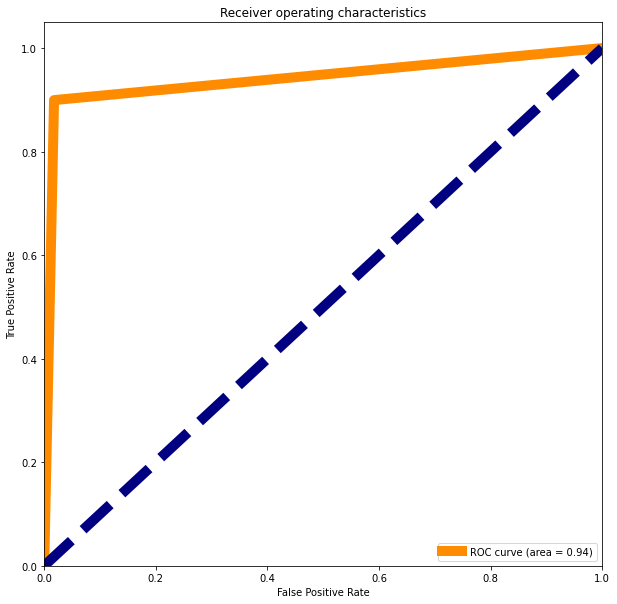

In [126]:
pr,tpr,threshold=roc_curve(predrf,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## Here 94% is under the curve which is best till now

In [127]:
# Checking accuracy for Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

print('CV  :-',cross_val_score(gb,x,y,cv=5).mean())


0.8901869158878505
[[193  32]
 [ 15 188]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       225
           1       0.85      0.93      0.89       203

    accuracy                           0.89       428
   macro avg       0.89      0.89      0.89       428
weighted avg       0.89      0.89      0.89       428

CV  :- 0.8742990654205608


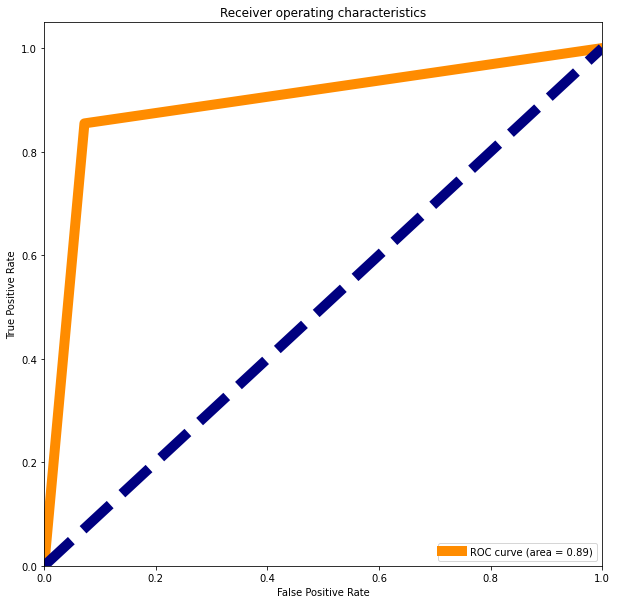

In [128]:
fpr,tpr,threshold=roc_curve(predgb,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## 89% area under roc curve

In [129]:
from sklearn.ensemble import ExtraTreesClassifier

# Checking accuracy for Gradient Boosting Classifier
et = ExtraTreesClassifier()
et.fit(x_train,y_train)

# Prediction
predet = et.predict(x_test)

print(accuracy_score(y_test, predet))
print(confusion_matrix(y_test, predet))
print(classification_report(y_test,predet))

print('CV  :-',cross_val_score(et,x,y,cv=5).mean())


0.955607476635514
[[213  12]
 [  7 196]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       225
           1       0.94      0.97      0.95       203

    accuracy                           0.96       428
   macro avg       0.96      0.96      0.96       428
weighted avg       0.96      0.96      0.96       428

CV  :- 0.933177570093458


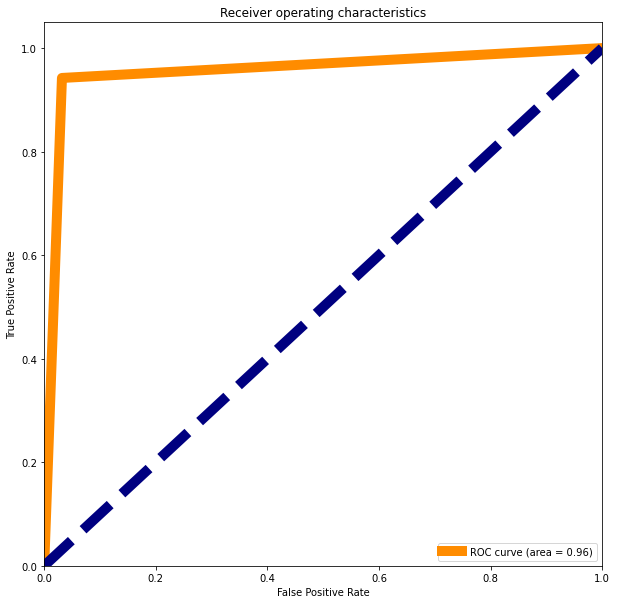

In [130]:
fpr,tpr,threshold=roc_curve(predet,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

# This is the best model so far and we will be taking it in hyper parameter tuning also

# Plotting ROC and compare AUC for all the models used

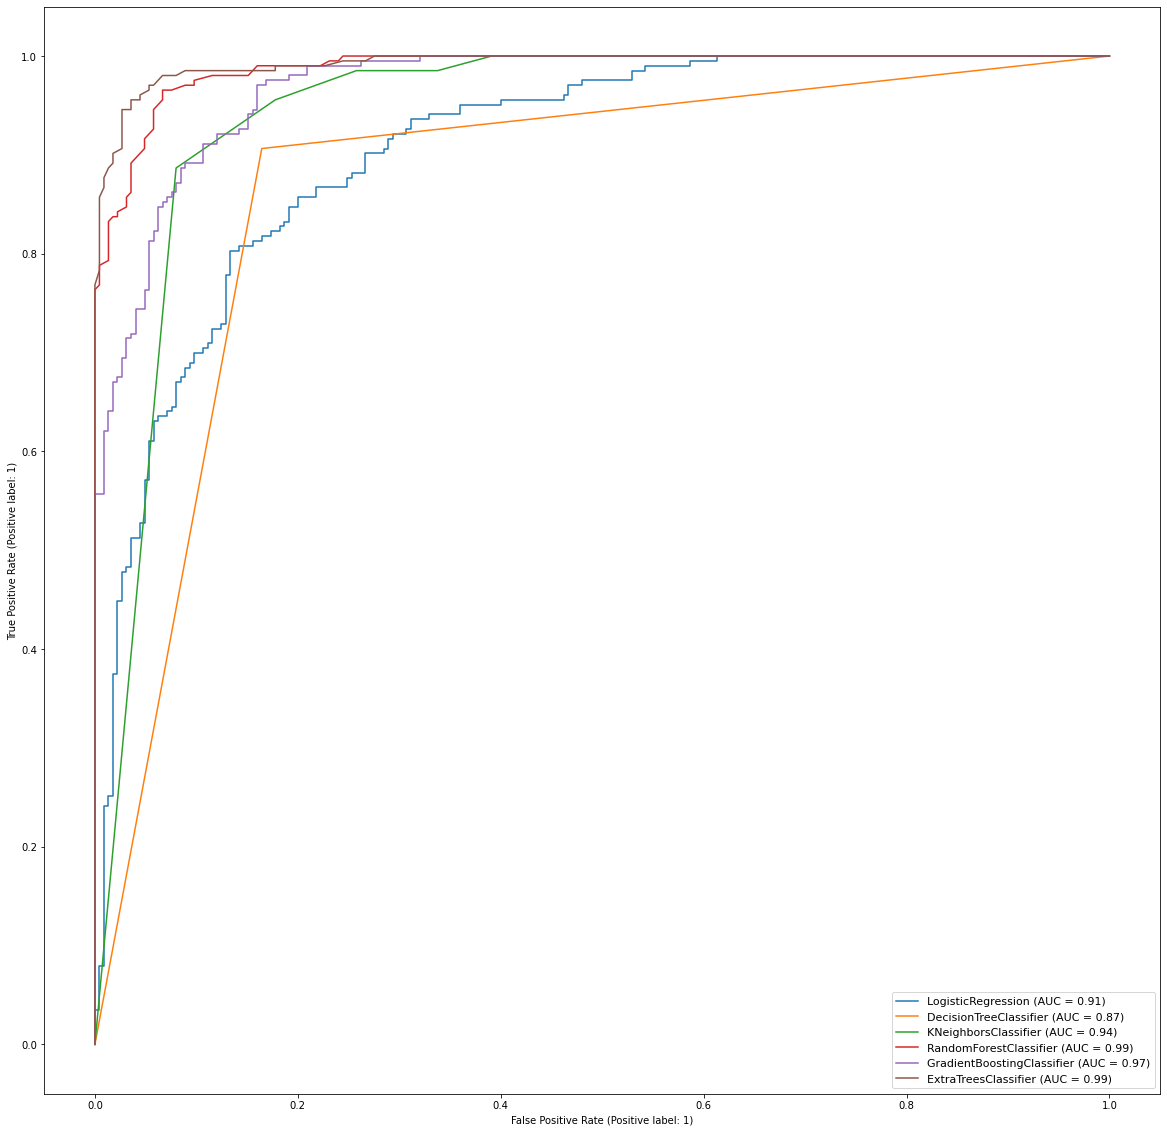

In [131]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp=plot_roc_curve(lr, x_test, y_test)   
plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(et, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

## So this is the AUC score of all the models

In [132]:
mm=pd.DataFrame([["LR","82%"],["Decision Tree Classifier","87%"],["KNeighbors Classifier","86%"],["Random Forest Classifier","93%"],["Gradient Boosting","89%"],["Extra Tree Classifier","96%"]],
                    columns=["Model_Name","AccuracyScore"])

mm

,Model_Name,AccuracyScore
0,LR,82%
1,Decision Tree Classifier,87%
2,KNeighbors Classifier,86%
3,Random Forest Classifier,93%
4,Gradient Boosting,89%
5,Extra Tree Classifier,96%


## We will be taking Extra tree for hyper parameter tuning

# Hyperparameter Tuning

In [133]:
from sklearn.model_selection import GridSearchCV


In [134]:
et.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [138]:
#Extra Tree Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 100],
              'max_depth' : [0, 10, 20],
              'warm_start' : [True , False],
              'n_estimators' : [50,100,150]}

In [139]:
qq=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [140]:
qq.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 150],
                         'random_state': [10, 50, 100],
                         'warm_start': [True, False]})

In [141]:
qq.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'random_state': 50,
 'warm_start': True}

In [142]:
et = ExtraTreesClassifier(criterion ='gini',max_depth=20, n_estimators=100,random_state=50,warm_start=True)
et.fit(x_train, y_train)
pred = et.predict(x_test)
print('Accuracy_Score :-> ',accuracy_score(y_test,pred)*100)

Accuracy_Score :->  95.32710280373831


### My final model accuracy is 95%

## Now Save the model

In [143]:
#Saving the model using .pkl
import joblib
joblib.dump(et,"Wine_study.pkl")

['Wine_study.pkl']

In [144]:
#Loading the saved model
aa=joblib.load("Wine_study.pkl")

In [145]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [146]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
Predicted,0,1,1,1,0,0,0,1,1,1,...,1,1,1,1,1,0,0,0,0,0
Original,0,1,1,1,0,0,0,1,1,1,...,1,1,0,1,1,0,0,0,0,0


## We can see my model is performing well and predicting well

----------------------------------------------------